In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath(".."))
from models.cnn2d_tf import CNNModel

# Load the signs dataset
(ds_train, ds_test), ds_info = tfds.load(
    'rock_paper_scissors',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Preprocess the dataset
def preprocess(image, label):
    image = tf.image.resize(image, (64, 64))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)


2025-03-05 18:05:56.202190: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-05 18:05:56.210336: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741197956.218690  860634 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741197956.221254  860634 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-05 18:05:56.231043: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

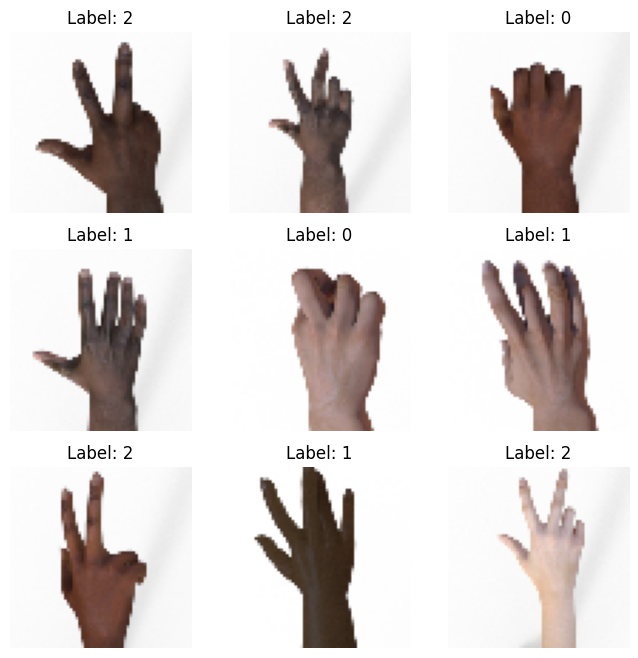

2025-03-05 18:07:32.502396: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [4]:
# Get a batch of images
for images, labels in ds_train.take(1):
    images, labels = images.numpy(), labels.numpy()  # Convert tensors to NumPy

    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Create a 3x3 grid
    for i, ax in enumerate(axes.flat):
        if i < len(images):  # Avoid indexing errors
            ax.imshow(images[i])
            ax.set_title(f"Label: {labels[i]}")
            ax.axis("off")  # Hide axes

    plt.show()

In [ ]:
# Define model parameters
input_shape = (64, 64, 3)
num_classes = 3
num_filters = [32, 64]
filter_sizes = [(3, 3), (3, 3)]
strides = [(1, 1), (1, 1)]
paddings = [(1, 1), (1, 1)]
pooling = [(2, 2), (2, 2)]

# Create the model instance
model = CNNModel(input_shape, num_classes, num_filters, filter_sizes, strides, paddings, pooling)

# Print model summary
model.build((None, *input_shape))  # Build the model before calling summary()
model.model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 66, 66, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        43,203 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,595 (244.51 KB)

 Trainable params: 62,595 (244.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=16)

NameError: name 'model' is not defined

In [7]:
model.evaluate(X_test, Y_test)

NameError: name 'model' is not defined